In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset
dataset1 = pd.read_csv('application_train.csv')

In [3]:
dataset1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dataset1.shape

(307511, 122)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Replace the anomalous values with nan
dataset1['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [7]:
# number and percentage of missing values in each column.    #afarin!

numm=307511-dataset1.count(axis=0)
pm=100*(307511-dataset1.count(axis=0))/307511

missing_values_tabel=pd.DataFrame({'1':numm.values,'Percentage of Missing Values%':pm.values},index=[list(dataset1)]) 
# now we see " the number of related columns" incloding missing values

missing_values_tabel=missing_values_tabel[missing_values_tabel.iloc[:,1]!=0] .sort_values('Percentage of Missing Values%',
                                                                                 ascending=False).round(1)
print('the number of related column (variables) incloding missing values is:\n',len(missing_values_tabel))

# Rename the columns
missing_values_tabel = missing_values_tabel.rename(columns = {'1' : 'Missing_Values'})
missing_values_tabel

the number of related column (variables) incloding missing values is:
 68


,Missing_Values,Percentage of Missing Values%
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [8]:
# Number of unique classes in each object column    IMPORTANT CODE!
dataset1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [9]:
# Create a label encoder object    
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in dataset1:
    if dataset1[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(dataset1[col].unique())) <= 2:
            # Train on the training data
            le.fit(dataset1[col])
            # Transform both training and testing data    # what is difference between fit and transform?
            dataset1[col] = le.transform(dataset1[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [10]:
# Number of each type of column      IMPORTANT!
dataset1.dtypes.value_counts()
#          BEFORE    NOW
# float64    65       65
# int64      41       41
# object     16       13
# int32                3  So we changed 3 object columns with LabelEncoding 
# dtype: int64

float64    66
int64      40
object     13
int32       3
dtype: int64

In [11]:
# one-hot encoding of categorical variables
dataset1 = pd.get_dummies(dataset1)

print('dataset1 Features shape: ', dataset1.shape)

dataset1 Features shape:  (307511, 243)


In [12]:
# Number of each type of column      IMPORTANT!
dataset1.dtypes.value_counts()
#           first    second     third
# float64    65       65         65
# int64      41       41         41
# object     16       13       
# int32                3          3          !we changed  3 object columns with LabelEncoding 
# unit                          134          !we changed 13 object columns (134 different object) 
#                                                                          with One-Hot-Encoder(get dummies) 
# dtype: int64

uint8      134
float64     66
int64       40
int32        3
dtype: int64

In [13]:
dataset1.shape

(307511, 243)

In [14]:
dataset1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# number and percentage of missing values in each column.    #afarin!

numm=307511-dataset1.count(axis=0)
pm=100*(307511-dataset1.count(axis=0))/307511

missing_values_tabel=pd.DataFrame({'1':numm.values,'Percentage of Missing Values%':pm.values},index=[list(dataset1)]) 
# now we see " the number of related columns" incloding missing values

missing_values_tabel=missing_values_tabel[missing_values_tabel.iloc[:,1]!=0] .sort_values('Percentage of Missing Values%',
                                                                                 ascending=False).round(1)
print('the number of related column (variables) incloding missing values is:\n',len(missing_values_tabel))

# Rename the columns
missing_values_tabel = missing_values_tabel.rename(columns = {'1' : 'Missing_Values'})
missing_values_tabel

the number of related column (variables) incloding missing values is:
 62


,Missing_Values,Percentage of Missing Values%
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FLOORSMIN_MODE,208642,67.8


In [16]:
# Apply per-column the median of that columns and fill the nan-values
dataset1=dataset1.apply(lambda x: x.fillna(x.median()),axis=0)

In [17]:
dataset1.shape

(307511, 243)

In [18]:
# number and percentage of missing values in each column.    #afarin!
# now this number has to be zero and it is!

numm=307511-dataset1.count(axis=0)
pm=100*(307511-dataset1.count(axis=0))/307511

missing_values_tabel=pd.DataFrame({'1':numm.values,'Percentage of Missing Values%':pm.values},index=[list(dataset1)]) 
# now we see " the number of related columns" incloding missing values

missing_values_tabel=missing_values_tabel[missing_values_tabel.iloc[:,1]!=0] .sort_values('Percentage of Missing Values%',
                                                                                 ascending=False).round(1)
print('the number of related column (variables) incloding missing values areas follows:\n',len(missing_values_tabel))

# Rename the columns
missing_values_tabel = missing_values_tabel.rename(columns = {'1' : 'Missing_Values'})
missing_values_tabel

the number of related column (variables) incloding missing values areas follows:
 0


,Missing_Values,Percentage of Missing Values%


In [19]:
X = dataset1.iloc[:, 2:243].values   # Note that we have to consider one index more in order to include the required index 
y = dataset1.iloc[:, 1].values       # here we have 122 columns which have index from "0" to "121"

In [20]:
X

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [21]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [22]:
X.shape

(307511, 241)

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
#  Understading whether the spliting process looks reasonable
print(y_test.mean())
y_train.mean()

0.0824187438011154


0.08030633150141459

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train.shape

(246008, 241)

In [27]:
X_test.shape

(61503, 241)

In [28]:
# " Initializing Logistic Regression "
from sklearn.linear_model import LogisticRegression

In [29]:
model_LR= LogisticRegression().fit(X_train, y_train)

In [30]:
# Predicting the Test set results
y_pred=model_LR.predict(X_test)
y_pred-y_test

array([ 0, -1,  0, ...,  0,  0,  0], dtype=int64)

In [31]:
# Confusion Matrix
# Step 13: This is the final step where we are evaluating our model performance. We already have original results and thus
# we can build confusion matrix to check the accuracy of model.
# Creating the Confusion Matrix
# (A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is
#  to count the number of times instances of class A are classified as class B. For example, to know the number of times 
#  the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[56363,    71],
       [ 5011,    58]], dtype=int64)

In [33]:
# ACC= (TP+TN)/(P+N) = (TP+TN)/(TP+TN+FP+FN)
(56490+75)/61503  # Awesome, we achieved 91.97% accuracy which is quite good.

0.919711233598361

In [34]:
# condition positive (P)
# the number of real positive cases in the data
# condition negative (N)
# the number of real negative cases in the data
# true positive (TP)
# eqv. with hit
# true negative (TN)
# eqv. with correct rejection
# false positive (FP)
# eqv. with false alarm, Type I error
# false negative (FN)
# eqv. with miss, Type II error
# sensitivity, recall, hit rate, or true positive rate (TPR)
# TPR= TP/P = TP/(TP+FN) = 1- FNR 
# specificity, selectivity or true negative rate (TNR)
# TNR= TN/N = TN/(TN+FP) = 1- FPR
# precision or positive predictive value (PPV)
# PPV= TP/(TP+FP) = 1- FDR
# negative predictive value (NPV)
# NPV= TN/(TN+FN) = 1- FOR
# miss rate or false negative rate (FNR)
# FNR= FN/P = FN/(FN+TP) = 1- TPR
# fall-out or false positive rate (FPR)
# FPR= FP/N = FP/(FP+TN) = 1- TNR
# false discovery rate (FDR)
# FDR= FP/(FP+TP) = 1- PPV 
# false omission rate (FOR)
# FOR= FN/(FN+TN) = 1- NPV
# accuracy (ACC)
# ACC= (TP+TN)/(P+N) = (TP+TN)/(TP+TN+FP+FN)
# F1 score is the harmonic mean of precision and sensitivity
# F1= 2TP/(2TP+FP+FN)

In [35]:
# The ROC Curve
# The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
# It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC
# curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the
# ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true
# negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR
# is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.
# To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the
# roc_curve() function:

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

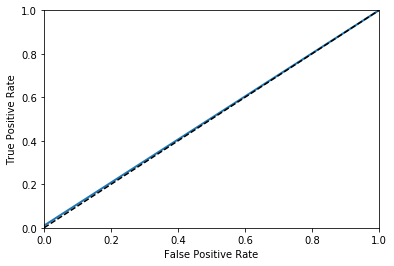

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()